In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv(r'C:\Users\Katia\Documents\UofT\STATS\final_project\df_cleaned.csv')
df.head(3)

,Tuition fees up to date,Scholarship holder,Gender,Curricular units 1st sem (approved/enrolled),Target
0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Tuition fees up to date','Scholarship holder','Gender','Curricular units 1st sem (approved/enrolled)']], 
                                                    df['Target'], 
                                                    test_size=0.3, 
                                                    random_state=13)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaled data from array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Tuition fees up to date','Scholarship holder','Gender','Curricular units 1st sem (approved/enrolled)'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Tuition fees up to date','Scholarship holder','Gender','Curricular units 1st sem (approved/enrolled)'])

# Create a logistic regression model (no incercept)
logistic_reg_model = LogisticRegression(random_state=13,
                                        # C=10**5,
                                        fit_intercept=False)

# Train the model
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test_scaled)

# Accuracy of predictions on training data
y_score_train = logistic_reg_model.score(X_train_scaled, y_train)
# Accuracy of predictions on testing data
y_score_test = logistic_reg_model.score(X_test_scaled, y_test)

# Coefficients
logistic_reg_model.get_params

# How well is the model predicting
print('Train score: ', y_score_train)
print('Test score: ', y_score_test, '\n')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Evaluation metrics
print('Accuracy: ', accuracy, '\n')
print('Confusion Matrix:\n', conf_matrix, '\n')
print('Classification Report:\n', classification_rep, '\n')

Train score:  0.8756395120031484
Test score:  0.8659320477502296 

Accuracy:  0.8659320477502296 

Confusion Matrix:
 [[621  37]
 [109 322]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       658
         1.0       0.90      0.75      0.82       431

    accuracy                           0.87      1089
   macro avg       0.87      0.85      0.86      1089
weighted avg       0.87      0.87      0.86      1089
 



In [ ]:
[[True Negative (TN) = 621, False Positive (FP)=37]
 [False Negative (FN) = 109, True Positive (TP)=322]]

Recall: The ability of a model to find all the relevant cases within a data set. 
    Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.
    Recall = TP/ (TP + FN) -- Proportion of positives we were able to identify correctly
    Recall = 322/(322+109) = 74.7%
    Quantity 
Precision: The ability of a classification model to identify only the relevant data points. 
    Mathematically, precision is the number of true positives divided by the number of true positives plus the number of false positives.
    Precision = TP / (TP + FP) -- Proportion of accurate positive predictions
    Precision = 322/(322+37) = 89.7%
    Quality

N = TP + TN + FN + FP

# POSITIVES IN SAMPLE = TP + FN
# POSITVES FLAGGED = TP + FP




In [27]:
print('intercept ', logistic_reg_model.intercept_[0])
print('classes', logistic_reg_model.classes_)
coef_df = pd.DataFrame({'coeff': logistic_reg_model.coef_[0]}, 
             index=X_train_scaled.columns)
coef_df['probability %'] =  coef_df['coeff'].apply(lambda x: np.round(100* np.exp(x),2) if x<0 else np.round(100* (np.exp(x)-1),2))

coef_df

# Tuition up to date: Being up to date with tuition reduces the chances of dropping out by almost 20%. 
#   I.e. Students who aren't up tp date on tuition payments are 20% more likely to dropout.
# Scholarship: Holding a scholarship reduces the chances of dropping out by approximately 60%. 
#   I.e. Students who don't have a scholarship are 60% more likely to dropout.
# Courses approved 1st semester: For every course approved in the 1st semester, the chances of dropping out decrease by 17%. 
#   I.e. For every course not passed,  are 20% more likely to dropout.


intercept  0.0
classes [0. 1.]


,coeff,probability %
Tuition fees up to date,-1.196692,30.22
Scholarship holder,-0.461859,63.01
Gender,0.188952,20.80
Curricular units 1st sem (approved/enrolled),-1.861610,15.54


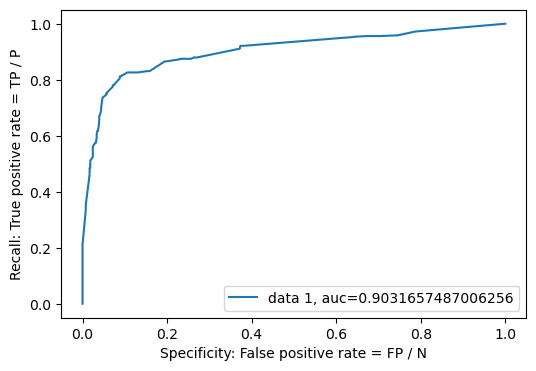

In [31]:
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
# It shows the tradeoff between sensitivity and specificity.
# The ROC curve plots recall (sensitivity) on the y-axis against specificity on the x-axis
y_pred_probability = logistic_reg_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_probability)
auc = roc_auc_score(y_test, y_pred_probability)

fig = plt.figure(figsize = (6,4))

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('Recall: True positive rate = TP / P')
plt.xlabel('Specificity: False positive rate = FP / N')
plt.legend(loc=4)
plt.show()